In [2]:
# Python bibliotekos
import numpy as np                  # "numpy" yra biblioteka darbui su didelėmis, daugiamatėmis masyvų ir matricų kolekcijomis bei matematinėmis funkcijomis
import pandas as pd                 # "pandas" suteikia struktūras duomenims ir įrankius jų analizei, pvz., DataFrame
import matplotlib.pyplot as plt     # "matplotlib.pyplot" yra vizualizacijos biblioteka, leidžianti piešti įvairius grafikus
import warnings                     # "warnings" leidžia valdyti įspėjimus: juos ignoruoti, spausdinti, ar klaidinti
import requests                     # "requests" leidžia siųsti HTTP užklausas naudojant Python
from datetime import datetime       # "datetime" modulis suteikia funkcijas darbui su data ir laiku
from bs4 import BeautifulSoup       # "BeautifulSoup" padeda atlikti internetinių puslapių šaltinio kodo (HTML, XML) analizę ir duomenų surinkimą
import time                         # "time" modulis suteikia funkcijas, susijusias su laiku, pvz., laiko gaišimą ar laiko matavimą
import sqlite3                      # "sqlite3" leidžia dirbti su SQLite duomenų bazėmis, atliekant duomenų saugojimo, atnaujinimo ir gavimo operacijas
from numpy.polynomial import Polynomial
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Suppressing warnings
warnings.filterwarnings('ignore')   # Nustato, kad visi įspėjimai būtų ignoruojami

# Set up Selenium webdriver options
from selenium import webdriver                          # "selenium.webdriver" leidžia automatizuoti veiksmus interneto naršyklėje
from selenium.webdriver.chrome.options import Options   # "Options" leidžia nustatyti konfigūracijas Chrome naršyklės draiveriui

# Papildomai importuojame: 
from sklearn.linear_model import LinearRegression  # Tiesinės regresijos modelis
from sklearn.model_selection import train_test_split  # Duomenų padalijimas į treniravimo ir testavimo rinkinius
from sklearn.model_selection import train_test_split, cross_val_score

In [2]:
# Vyno failo atsisiuntimas

# Wine Quality Dataset
import kagglehub
# Download latest version
path = kagglehub.dataset_download("yasserh/wine-quality-dataset")
print("Path to dataset files:", path)

# Užduotis - naudodamiesi savo žinomais ML įrankiais
# įvertinkite vynų kokybę (quality)
# pateikite confusion matrix vizualizacijas, accuracy score

100%|██████████| 21.5k/21.5k [00:00<00:00, 1.24MB/s]

Extracting files...
Path to dataset files: C:\Users\Pauliussl\.cache\kagglehub\datasets\yasserh\wine-quality-dataset\versions\1


In [ ]:
# Užduotis - naudodamiesi savo žinomais ML įrankiais
# įvertinkite vynų kokybę (quality)
# pateikite confusion matrix vizualizacijas, accuracy score

In [39]:
# Atsidarome vynu faila 
file_path = r"C:\Users\Pauliussl\Paskaita72\Vynas.csv"
data = pd.read_csv(file_path)
print(data.head())

   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  Id  
0      9.4        5   0  
1      9.8        5   1  
2      9

In [42]:
#Treniruojame train_test_split
X = data.drop('quality', axis=1)
y = data['quality']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=12)


Decision Tree tikslumas: 0.64


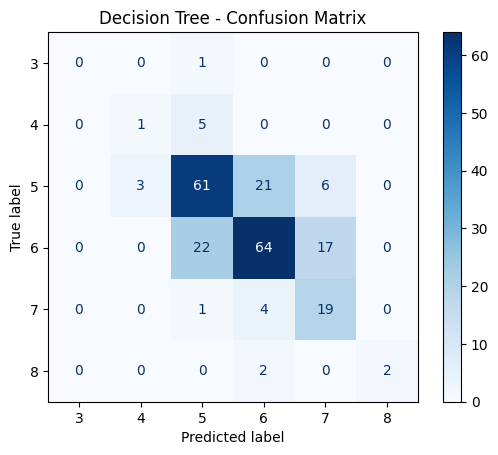

In [50]:
# Decision Tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay


decision_tree = DecisionTreeClassifier(random_state=42)  # Sukurkite sprendimų medžio modelį
decision_tree.fit(X_train, y_train)  # Treniruokite modelį
y_pred_dt = decision_tree.predict(X_test)  # Predictions 

# Tikslumo įvertinimas
accuracy_dt = accuracy_score(y_test, y_pred_dt)
print(f"Decision Tree tikslumas: {accuracy_dt:.2f}")

# Confusion Matrix
cm_dt = confusion_matrix(y_test, y_pred_dt)
disp_dt = ConfusionMatrixDisplay(confusion_matrix=cm_dt, display_labels=decision_tree.classes_)
disp_dt.plot(cmap='Blues')
plt.title("Decision Tree - Confusion Matrix")
plt.show()


Logistic Regression tikslumas: 0.55


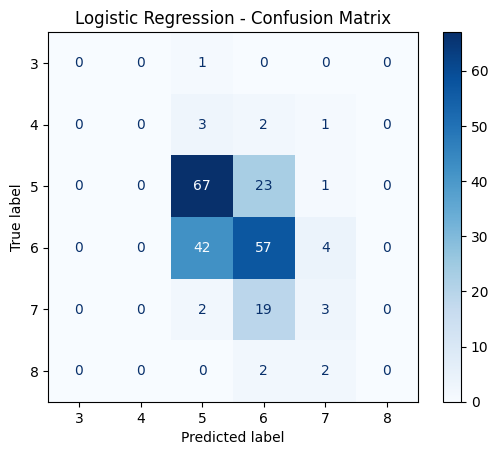

In [51]:
# Logistic Regression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay

log_reg = LogisticRegression(max_iter=1000, random_state=42)  # Sukurkite logistinės regresijos modelį
log_reg.fit(X_train, y_train)  # Treniruokite modelį su esamomis klasėmis
y_pred_lr = log_reg.predict(X_test)  # Predictions

# Tikslumo įvertinimas
accuracy_lr = accuracy_score(y_test, y_pred_lr)
print(f"Logistic Regression tikslumas: {accuracy_lr:.2f}")

# Confusion Matrix
cm_lr = confusion_matrix(y_test, y_pred_lr)
disp_lr = ConfusionMatrixDisplay(confusion_matrix=cm_lr, display_labels=log_reg.classes_)
disp_lr.plot(cmap='Blues')
plt.title("Logistic Regression - Confusion Matrix")
plt.show()

Logistic Regression tikslumas: 0.55


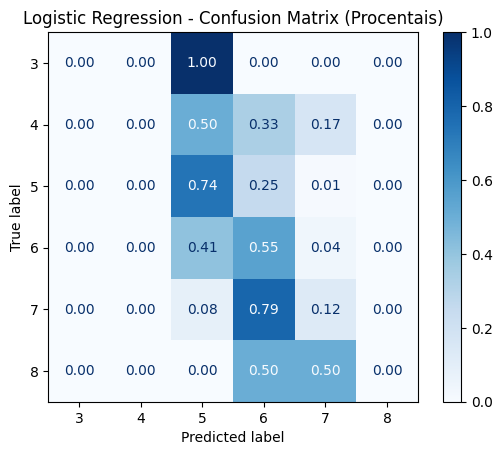

In [49]:
# Logistic Regression

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay

# Sukurkite logistinės regresijos modelį
log_reg = LogisticRegression(max_iter=1000, random_state=42)

# Treniruokite modelį su esamomis klasėmis
log_reg.fit(X_train, y_train)

# Predictions
y_pred_lr = log_reg.predict(X_test)

# Tikslumo įvertinimas
accuracy_lr = accuracy_score(y_test, y_pred_lr)
print(f"Logistic Regression tikslumas: {accuracy_lr:.2f}")

# Confusion Matrix (normalizuota procentais)
cm_lr = confusion_matrix(y_test, y_pred_lr, normalize='true')
disp_lr = ConfusionMatrixDisplay(confusion_matrix=cm_lr, display_labels=log_reg.classes_)
disp_lr.plot(cmap='Blues', values_format=".2f")  # ".2f" formatas rodo 2 skaitmenis po kablelio
plt.title("Logistic Regression - Confusion Matrix (Procentais)")
plt.show()


In [52]:
# MOvie DB https://grouplens.org/datasets/movielens/
# https://files.grouplens.org/datasets/movielens/ml-32m-README.html

# Projektas (kažkiek dienų trukmės) 
# Filmų rekomendacijos skriptas (Jupyter notebook)  arba Streamlit aplikacija
# Rekomenduoti filmus pagal pasirinkimus (remiantis kitų vartotojų vertinimais) - vartotojas įveda žanrą, aktorių, etc .. 
# (apribokite įvestį 3-5 parametrais)
# Rezultatas - rekomenduojami filmai ( 1, 2 ar daugiau)

# get_dummies() -> dummy_df = df["Fruits"].str.get_dummies(", ") 
# iš čia: https://stackoverflow.com/questions/76783764/pandas-get-dummies-on-rows-with-multiple-entries

In [2]:
#Susidedame visus CSV i viena faila.
#Ikeliame CSV failus 
file_path = r'C:\Users\Pauliussl\Paskaita72\filmai'
df = pd.read_csv(f"{file_path}\\links.csv")
movies = pd.read_csv(f"{file_path}\\movies.csv")
ratings = pd.read_csv(f"{file_path}\\ratings.csv")
tags = pd.read_csv(f"{file_path}\\tags.csv")

# Pradėkite jungimą
movies_links = pd.merge(movies, df, on="movieId", how="inner")
movies_links_ratings = pd.merge(movies_links, ratings, on="movieId", how="inner")
final_df = pd.merge(movies_links_ratings, tags, on=["movieId", "userId"], how="left")

# Išsaugokite į vieną CSV failą, jei reikia
output_path = f"{file_path}\\visi_filmai.csv"
final_df.to_csv(output_path, index=False)
print(f"Susijungęs failas išsaugotas: {output_path}")


KeyboardInterrupt: 

In [5]:
#Kreipiames i pagr. CSV
file_path = r'C:\Users\Pauliussl\Paskaita72\filmai\visi_filmai.csv'
df = pd.read_csv(file_path, nrows=900000)
df = df.drop(columns=['timestamp_y','tmdbId','imdbId'])
df = df.drop(columns=['timestamp_x'])
df['genres_list'] = df['genres'].str.split('|')
df = df.drop(columns=['genres'])
df['tags'] = df.groupby('movieId')['tag'].transform(lambda x: ', '.join(x.dropna().unique()))
df['tags'] = df['tags'].astype(str)
df = df.drop(columns=['tag'])
df['title_count'] = df.groupby('title')['title'].transform('count')
# df['rating'] = df['rating'].astype(float)
df['rating_avg'] = df.groupby('title')['rating'].transform('mean')

df = df.drop(columns=['userId', 'rating'])
df = df.groupby('movieId', as_index=False).first()
df.head(10)




,movieId,title,genres_list,tags,title_count,rating_avg
0,1,Toy Story (1995),"[Adventure, Animation, Children, Comedy, Fantasy]","children, Disney, animation, pixar, funny, Pix...",69947,3.897472
1,2,Jumanji (1995),"[Adventure, Children, Fantasy]","Robin Williams, fantasy, time travel, animals,...",29390,3.276199
2,3,Grumpier Old Men (1995),"[Comedy, Romance]","comedinha de velhinhos engraÃƒÂ§ada, comedinha...",13136,3.139350
3,4,Waiting to Exhale (1995),"[Comedy, Drama, Romance]","characters, slurs, chick flick, revenge",2808,2.845620
4,5,Father of the Bride Part II (1995),[Comedy],"Fantasy, pregnancy, remake, family, Steve Mart...",13196,3.061610
5,6,Heat (1995),"[Action, Crime, Thriller]","atmospheric, dialogue, Tumey's DVDs, realistic...",30138,3.874063
6,7,Sabrina (1995),"[Comedy, Romance]","as good maybe better than original, great cast...",13616,3.366040
7,8,Tom and Huck (1995),"[Adventure, Children]",,1510,3.115563
8,9,Sudden Death (1995),[Action],"Action, Jean-Claude Van Damme",4155,2.987726
9,10,GoldenEye (1995),"[Action, Adventure, Thriller]","james bond, 007, Bond, casual sex, espionage, ...",32833,3.434015


In [ ]:
zanrai = {'Action', 'War', 'IMAX', 'Fantasy', 'Comedy', 'Mystery', 'Musical', 'Horror', 'Drama', 'Animation', 'Documentary', 'Children', 'Adventure', 'Thriller', 'Romance', 'Crime', 'Sci-Fi'}
reitingai = {'1','2','3','4','5'}
tipas = {'daugiausia perziuriu', 'geriausiai ivertintas'}
# irasykite paieskos laukeli



In [6]:
# Python bibliotekos
import numpy as np                  # "numpy" yra biblioteka darbui su didelėmis, daugiamatėmis masyvų ir matricų kolekcijomis bei matematinėmis funkcijomis
import pandas as pd                 # "pandas" suteikia struktūras duomenims ir įrankius jų analizei, pvz., DataFrame
import matplotlib.pyplot as plt     # "matplotlib.pyplot" yra vizualizacijos biblioteka, leidžianti piešti įvairius grafikus
import warnings                     # "warnings" leidžia valdyti įspėjimus: juos ignoruoti, spausdinti, ar klaidinti
import requests                     # "requests" leidžia siųsti HTTP užklausas naudojant Python
from datetime import datetime       # "datetime" modulis suteikia funkcijas darbui su data ir laiku
from bs4 import BeautifulSoup       # "BeautifulSoup" padeda atlikti internetinių puslapių šaltinio kodo (HTML, XML) analizę ir duomenų surinkimą
import time                         # "time" modulis suteikia funkcijas, susijusias su laiku, pvz., laiko gaišimą ar laiko matavimą
import sqlite3                      # "sqlite3" leidžia dirbti su SQLite duomenų bazėmis, atliekant duomenų saugojimo, atnaujinimo ir gavimo operacijas
from numpy.polynomial import Polynomial
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Suppressing warnings
warnings.filterwarnings('ignore')   # Nustato, kad visi įspėjimai būtų ignoruojami

# Set up Selenium webdriver options
from selenium import webdriver                          # "selenium.webdriver" leidžia automatizuoti veiksmus interneto naršyklėje
from selenium.webdriver.chrome.options import Options   # "Options" leidžia nustatyti konfigūracijas Chrome naršyklės draiveriui

# Papildomai importuojame: 
from sklearn.linear_model import LinearRegression  # Tiesinės regresijos modelis
from sklearn.model_selection import train_test_split  # Duomenų padalijimas į treniravimo ir testavimo rinkinius
from sklearn.model_selection import train_test_split, cross_val_score

#Kreipiames i pagr. CSV
file_path = r'C:\Users\Pauliussl\Paskaita72\filmai\visi_filmai.csv'
df = pd.read_csv(file_path, nrows=900000)
df = df.drop(columns=['timestamp_y','tmdbId','imdbId'])
df = df.drop(columns=['timestamp_x'])
df['genres_list'] = df['genres'].str.split('|')
df = df.drop(columns=['genres'])
df['tags'] = df.groupby('movieId')['tag'].transform(lambda x: ', '.join(x.dropna().unique()))
df['tags'] = df['tags'].astype(str)
df = df.drop(columns=['tag'])
df['title_count'] = df.groupby('title')['title'].transform('count')
df.rename(columns={'title_count': 'Perziuriu_skaicius'}, inplace=True)
df.rename(columns={'rating_avg': 'Rating'}, inplace=True)
# df['rating'] = df['rating'].astype(float)
df['Rating'] = df.groupby('title')['rating'].transform('mean')

df = df.drop(columns=['userId', 'rating'])
df = df.groupby('movieId', as_index=False).first()

import streamlit as st

# Streamlit puslapio nustatymai 
st.set_page_config(layout="wide")  # Nustato „wide“ išdėstymą
st.title("Filmų žanras")

# Atrinkimo tipas 
all_options = {'Perziuriu skaicius', 'Auksciausias reitingas'}
selected_options = st.selectbox("Pasirinkite vertinimo logika:", sorted(all_options))

# Filmu žanro pasirinkimai 
all_genres = {'Action', 'War', 'IMAX', 'Fantasy', 'Comedy', 'Mystery', 'Musical', 'Horror', 'Drama', 'Animation', 'Documentary', 'Children', 'Adventure', 'Thriller', 'Romance', 'Crime', 'Sci-Fi'}
selected_genre = st.selectbox("Pasirinkite žanrą:", sorted(all_genres))
selected_genre2 = st.selectbox("Pasirinkite žanrą 2:", sorted(all_genres))
filtered_df = df[df['genres_list'].apply(lambda genres: selected_genre in genres and selected_genre2 in genres)]   # Filtruojame duomenis pagal pasirinktą žanrą

# Filmu ratings pasirinkimai 
rating_selected = st.slider('Pasirinkite reitingą (nuo):', min_value=0, max_value=5, value=3)
filtered_df = filtered_df[filtered_df['Rating'] >= rating_selected]


# Atrinkimo tipas: IF 

if selected_options == 'Perziuriu skaicius':
    filtered_df = filtered_df.sort_values(by='Perziuru_skaicius', ascending=False)
elif selected_options == 'Auksciausias reitingas':
    filtered_df = filtered_df.sort_values(by='Rating', ascending=False)


# Lentele
st.dataframe(filtered_df[['title', 'genres_list', 'tags', 'Rating', 'Perziuriu_skaicius']].head(7), use_container_width=True)


2025-01-03 19:04:49.091 WARNING streamlit.runtime.scriptrunner_utils.script_run_context: Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-01-03 19:04:49.092 WARNING streamlit.runtime.scriptrunner_utils.script_run_context: Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-01-03 19:04:49.332 
  command:

    streamlit run C:\Users\Pauliussl\AppData\Roaming\Python\Python312\site-packages\ipykernel_launcher.py [ARGUMENTS]
2025-01-03 19:04:49.333 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-01-03 19:04:49.334 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-01-03 19:04:49.334 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-01-03 19:04:49.335 Thread 'MainThread': missing ScriptRunContext! This warning c

DeltaGenerator()

In [7]:
st.write(filtered_df.columns)

2025-01-03 19:05:53.820 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-01-03 19:05:53.821 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.


In [3]:
file_path = r'C:\Users\Pauliussl\Paskaita72\filmai\visi_filmai.csv'
df = pd.read_csv(file_path)
df = df.drop(columns=['timestamp_y','tmdbId','imdbId'])
df = df.drop(columns=['timestamp_x'])
df['genres_list'] = df['genres'].str.split('|')
df = df.drop(columns=['genres'])
df['tags'] = df.groupby('movieId')['tag'].transform(lambda x: ', '.join(x.dropna().unique()))
df['tags'] = df['tags'].astype(str)
df = df.drop(columns=['tag'])
df['title_count'] = df.groupby('title')['title'].transform('count')
df.rename(columns={'rating_avg': 'Rating'}, inplace=True)
# df['rating'] = df['rating'].astype(float)
df['Rating'] = df.groupby('title')['rating'].transform('mean')

df = df.drop(columns=['userId', 'rating'])
df = df.groupby('movieId', as_index=False).first()
df = df[df['title_count'] >= 500]
df.head()

,movieId,title,genres_list,tags,title_count,Rating
0,1,Toy Story (1995),"[Adventure, Animation, Children, Comedy, Fantasy]","children, Disney, animation, pixar, funny, Pix...",69947,3.897472
1,2,Jumanji (1995),"[Adventure, Children, Fantasy]","Robin Williams, fantasy, time travel, animals,...",29390,3.276199
2,3,Grumpier Old Men (1995),"[Comedy, Romance]","comedinha de velhinhos engraÃƒÂ§ada, comedinha...",13136,3.139350
3,4,Waiting to Exhale (1995),"[Comedy, Drama, Romance]","characters, slurs, chick flick, revenge",2808,2.845620
4,5,Father of the Bride Part II (1995),[Comedy],"Fantasy, pregnancy, remake, family, Steve Mart...",13196,3.061610


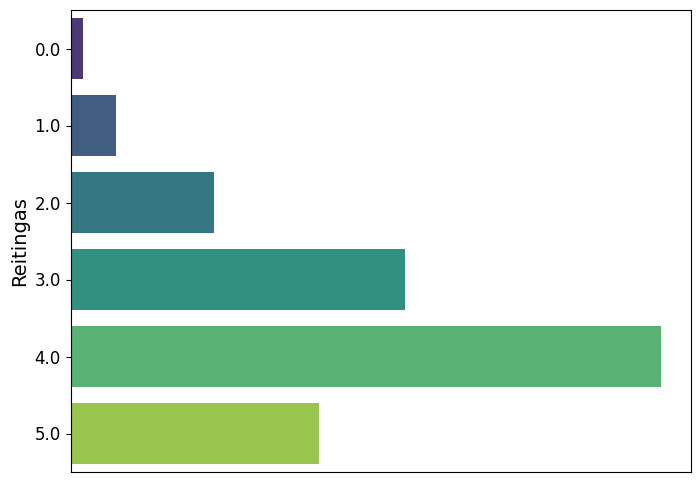

In [ ]:


#Kreipiames i pagr. CSV
file_path = r'C:\Users\Pauliussl\Paskaita72\filmai\visi_filmai.csv'
df = pd.read_csv(file_path, nrows=900000)
df = df.drop(columns=['timestamp_y','tmdbId','imdbId','movieId','genres', 'userId','timestamp_x', 'tag', 'timestamp_y'])
df['rating'] = df['rating'].round()
df.head()
# Sukuriame reitingų dažnių lentelę ir rūšiuojame mažėjančia tvarka pagal reitingą
rating_counts = df['rating'].value_counts().sort_index(ascending=False)
plt.figure(figsize=(8, 6))
sns.barplot(y=rating_counts.index, x=rating_counts.values, palette="viridis", orient='h')

# Diagramų pavadinimai
plt.ylabel('Reitingas', fontsize=14)

# Tinklelis ir šriftai
plt.yticks(fontsize=12)
plt.xticks([])
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()


